In [1]:

%pprint

Pretty printing has been turned OFF


In [2]:

%run ../../load_magic/dataframes.py
%run ../../load_magic/storage.py
s = Storage()
print(['s.{}'.format(fn) for fn in dir(s) if not fn.startswith('_')])
dir()

['s.attempt_to_pickle', 's.data_csv_folder', 's.data_folder', 's.encoding_type', 's.load_csv', 's.load_dataframes', 's.load_object', 's.save_dataframes', 's.saves_csv_folder', 's.saves_folder', 's.saves_pickle_folder', 's.store_objects']


['In', 'Out', 'Storage', '_', '__', '___', '__builtin__', '__builtins__', '__doc__', '__loader__', '__name__', '__nonzero__', '__package__', '__spec__', '_dh', '_i', '_i1', '_i2', '_ih', '_ii', '_iii', '_oh', 'csv', 'example_iterrows', 'exit', 'filepath_regex', 'get_column_descriptions', 'get_ipython', 'get_max_rsquared_adj', 'get_page_tables', 'io', 'math', 'os', 'pd', 'pickle', 'plt', 'quit', 're', 's', 'sm', 'sns', 'stats', 'sys', 'url_regex']

In [45]:

states_stats_df = s.load_object('states_stats_df').sort_index()
s.save_dataframes(states_stats_df=states_stats_df)
states_stats_df.columns.tolist()

Saving to D:\Documents\Repositories\notebooks\covid19\saves\csv\states_stats_df.csv


['White_Percent', 'Black_Percent', 'Hispanic_Percent', 'Asian_Percent', 'Native_Percent', 'Islander_Percent', 'Multi_Percent', 'Gini_Index', 'Effectiveness_Rank', 'Health_Care_Score', 'Education_Score', 'Economy_Score', 'Infrastructure_Score', 'Opportunity_Score', 'Fiscal_Stability_Score', 'Crime_Corrections_Score', 'Natural_Environment_Score', 'district_abbreviation', 'GDP_Rank', 'GDP_2018', 'GDP_Percent', 'State_Region', 'Homicide_Rate_2018', 'Homicide_Rate_2017', 'Homicide_Rate_2014', 'Homicide_Rate_2010', 'Homicide_Rate_2005', 'Homicide_Rate_2000', 'Homicide_Rate_1996', 'Guns_Rank', 'Guns_Per_Capita', 'Guns_Registered', 'Suicide_Rate_2017', 'Suicide_Deaths_2017', 'Suicide_Rate_2016', 'Suicide_Deaths_2016', 'Suicide_Rate_2015', 'Suicide_Deaths_2015', 'Suicide_Rate_2014', 'Suicide_Deaths_2014', 'Suicide_Rate_2005', 'Suicide_Deaths_2005', 'Total_Inhabitants_2010', 'Inhabitants_Per_Square_Mile_2010', 'Total_Murder_Deaths_2010', 'Total_Gun_Murder_Deaths_2010', 'Gun_Ownership_Percent_201


----
# Scrape the Data

In [39]:

try:
    us_populations_df = s.load_object('us_populations_df')
except:
    tables_url = 'https://en.wikipedia.org/wiki/2010_United_States_Census'
    tables_list = get_page_tables(tables_url)

No pickle exists at D:\Documents\Repositories\notebooks\covid19\saves\pickle\us_populations_df.pickle - attempting to load as csv.
No csv exists at D:\Documents\Repositories\notebooks\covid19\saves\csv\us_populations_df.csv - attempting to download from URL.
[(4, (100, 7)), (2, (52, 6)), (3, (25, 4)), (0, (9, 2)), (1, (1, 5)), (6, (2, 2)), (5, (1, 2))]


In [44]:

us_populations_df = tables_list[2].copy()
us_populations_df.columns = ['Rank', 'State_Name', 'Census_Population_2000', 'Census_Population_2010', 'Change', 'Percent_Change']
columns_list = ['State_Name', 'Census_Population_2010']
us_populations_df = us_populations_df[columns_list]
us_populations_df.set_index('State_Name', drop=True, inplace=True)
us_populations_df.Census_Population_2010 = us_populations_df.Census_Population_2010.map(lambda x: int(x))
mask_series = us_populations_df.index.isin(states_stats_df.index)
us_populations_df = us_populations_df[mask_series].sort_index()
us_populations_df.sample(5)

,Census_Population_2010
State_Name,
New York,19378102
Arkansas,2915918
Indiana,6483802
Michigan,9883640
California,37253956


In [46]:

states_stats_df.Census_Population_2010 = us_populations_df.Census_Population_2010

In [4]:

try:
    us_temps_df = s.load_object('us_temps_df')
except:
    tables_url = 'http://www.usa.com/rank/us--average-temperature--state-rank.htm'
    tables_list = get_page_tables(tables_url)

No pickle exists at D:\Documents\Repositories\notebooks\covid19\saves\pickle\us_temps_df.pickle - attempting to load as csv.
No csv exists at D:\Documents\Repositories\notebooks\covid19\saves\csv\us_temps_df.csv - attempting to download from URL.
[(0, (52, 3))]


In [15]:

us_temps_df = tables_list[0].copy()
#us_temps_df.columns = us_temps_df.iloc[0].tolist()
us_temps_df.columns = ['Rank', 'Average_Temperature', 'State_Population']
idx_list = list(range(1, 52))
mask_series = us_temps_df.index.isin(idx_list)
us_temps_df = us_temps_df[mask_series]
us_temps_df['State_Name'] = us_temps_df.State_Population.map(lambda x: str(x).split('/')[0].strip())
us_temps_df.Average_Temperature = us_temps_df.Average_Temperature.map(lambda x: (float(str(x).split('°')[0]) - 32) * 5/9)
columns_list = ['State_Name', 'Average_Temperature']
us_temps_df = us_temps_df[columns_list]
us_temps_df.set_index('State_Name', drop=True, inplace=True)
us_temps_df.sample(5)

,Average_Temperature
State_Name,
Colorado,7.922222
Ohio,10.488889
Texas,18.872222
Maryland,12.561111
Kentucky,13.122222


In [17]:

states_stats_df = states_stats_df.merge(us_temps_df, left_index=True, right_index=True, suffixes=('_stats', '_temps'))

In [47]:

s.store_objects(us_populations_df=us_populations_df, us_temps_df=us_temps_df, states_stats_df=states_stats_df)

Pickling to D:\Documents\Repositories\notebooks\covid19\saves\pickle\us_populations_df.pickle
Pickling to D:\Documents\Repositories\notebooks\covid19\saves\pickle\us_temps_df.pickle
Pickling to D:\Documents\Repositories\notebooks\covid19\saves\pickle\states_stats_df.pickle


# Real-World Application to US Data

### Setup

Load US state case data from CovidTracking.com

In [27]:

url = 'https://covidtracking.com/api/v1/states/daily.csv'
states_series = pd.read_csv(url,
                            usecols=['date', 'state', 'death'],
                            parse_dates=['date'],
                            index_col=['state', 'date'],
                            squeeze=True).sort_index()

In [36]:

us_deaths_df = states_series.groupby('state').max().to_frame()
us_deaths_df.columns = ['Cumulative_Deaths']
us_deaths_df.index.name = 'State_Abbreviation'
us_deaths_df.sample(5)

,Cumulative_Deaths
State_Abbreviation,
HI,17.0
NJ,8801.0
CT,2797.0
IN,1414.0
NV,286.0


In [26]:

states_series.index.get_level_values('state')

Index(['AK', 'AK', 'AK', 'AK', 'AK', 'AK', 'AK', 'AK', 'AK', 'AK',
       ...
       'WY', 'WY', 'WY', 'WY', 'WY', 'WY', 'WY', 'WY', 'WY', 'WY'],
      dtype='object', name='state', length=3545)

In [48]:

columns_list = ['State_Abbreviation', 'Average_Temperature', 'Census_Population_2010']
us_temps_df = states_stats_df[columns_list]
us_temps_df.set_index('State_Abbreviation', drop=True, inplace=True)
us_temps_df.sample(5)

,Average_Temperature,Census_Population_2010
State_Abbreviation,,
VA,13.077778,8001024
LA,19.300000,4533372
NJ,11.072222,8791894
GA,16.833333,9687653
ID,7.955556,1567582



----
# Merge the Data

In [49]:

merge_df = us_temps_df.merge(us_deaths_df, left_index=True, right_index=True, suffixes=('_temps', '_deaths'))
merge_df['Deaths_per_Capita'] = merge_df.apply(lambda row_series: row_series.Cumulative_Deaths/row_series.Census_Population_2010,
                                               axis='columns')
merge_df.sample(5)

,Average_Temperature,Census_Population_2010,Cumulative_Deaths,Deaths_per_Capita
State_Abbreviation,,,,
IA,8.966667,3046355,231.0,0.000076
ID,7.955556,1567582,66.0,0.000042
KY,13.122222,4339367,283.0,0.000065
ND,4.888889,672591,31.0,0.000046
SD,7.522222,814180,31.0,0.000038


In [51]:

import numpy as np

merge_df['Log_Deaths_per_Capita'] = merge_df.Deaths_per_Capita.map(lambda x: np.log(x))


----
# Plot the Data

In [55]:

inf_nan_mask = get_inf_nan_mask(merge_df.Average_Temperature.values, merge_df.Log_Deaths_per_Capita.values)
df = merge_df[pd.Series(inf_nan_mask, index=merge_df.index)]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:417: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot(grid, yhat, **kws)


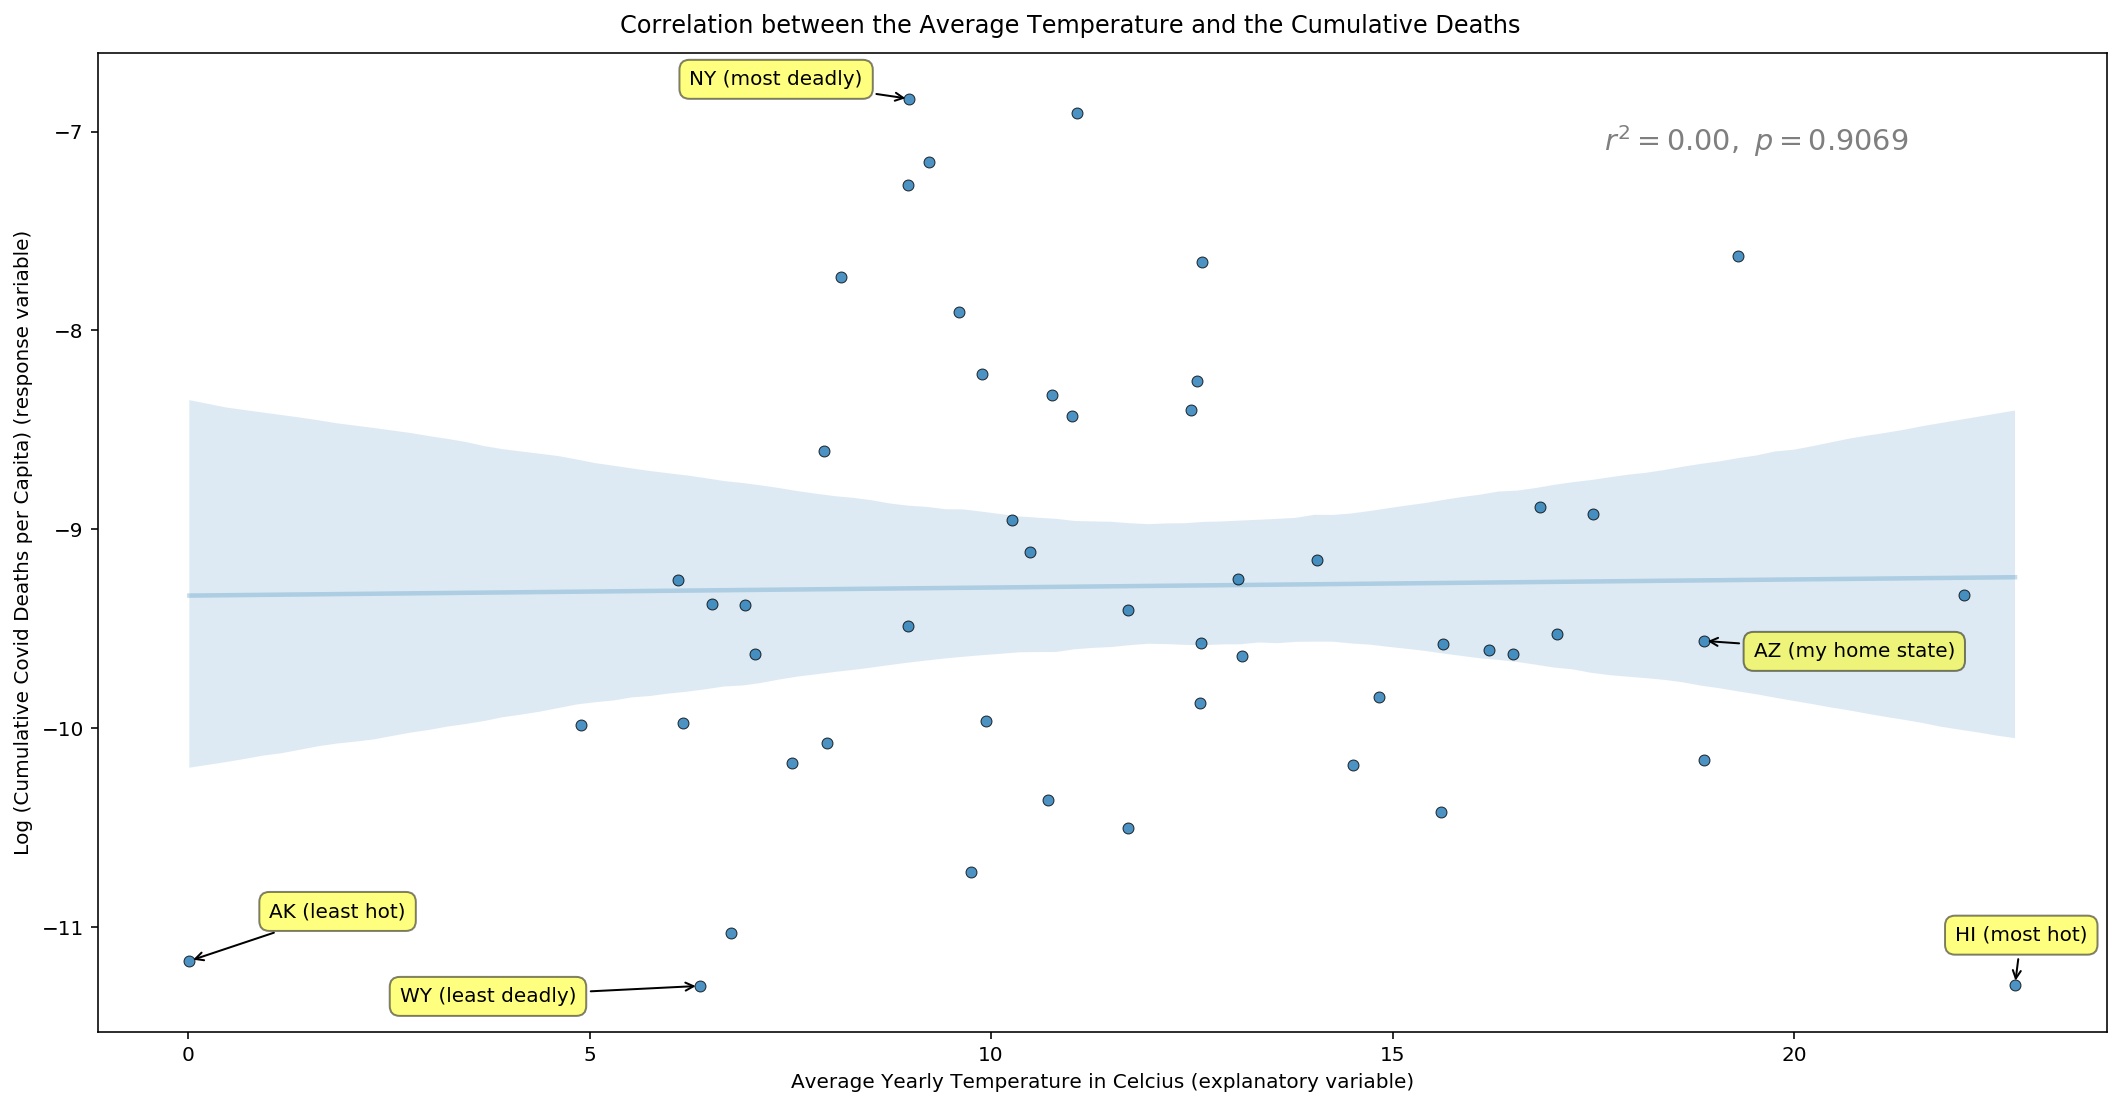

In [69]:

%run ../../load_magic/charts.py
title_text = 'Correlation between the Average Temperature and the Cumulative Deaths'
first_order_linear_scatterplot(df, 'Average_Temperature', 'Log_Deaths_per_Capita',
                               xlabel_str='Average Yearly Temperature in Celcius (explanatory variable)',
                               ylabel_str='Log (Cumulative Covid Deaths per Capita) (response variable)',
                               x_adj='hot', y_adj='deadly', title=title_text, idx_reference='AZ',
                               annot_reference='my home state', aspect_ratio=18/9,
                               least_x_xytext=(40, 20), most_x_xytext=(-30, 20),
                               least_y_xytext=(-150, -10), most_y_xytext=(-110, 5),
                               reference_xytext=(25, -10))